## 1. Blur filter

### 1.1 boxFilter and bilateralFilter

In [1]:
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst1= cv2.boxFilter(src, ddepth=-1, ksize=(11, 11))
dst2 = cv2.boxFilter(src, ddepth=-1, ksize=(21, 21))

dst3 = cv2.bilateralFilter(src, d=11, sigmaColor=10, sigmaSpace=10)
dst4 = cv2.bilateralFilter(src, d=-1, sigmaColor=10, sigmaSpace=10)

cv2.imshow('dst1',  dst1)    
cv2.imshow('dst2',  dst2)
cv2.imshow('dst3',  dst3)
cv2.imshow('dst4',  dst4)
cv2.waitKey()    
cv2.destroyAllWindows()

### 1.2 median filter, blur, Gaussian filter

In [2]:
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst1= cv2.medianBlur(src, ksize = 7)
dst2 = cv2.blur(src, ksize=(7, 7))
dst3 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
dst4 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=10.0)

cv2.imshow('dst1',  dst1)    
cv2.imshow('dst2',  dst2)
cv2.imshow('dst3',  dst3)
cv2.imshow('dst4',  dst4)
cv2.waitKey()    
cv2.destroyAllWindows()

## 2. Differential filter

### 2.1 Sobel filter 1

In [3]:
import cv2
import numpy as np

src = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)

#2
dstX = cv2.sqrt(np.abs(gx))
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#3
dstY = cv2.sqrt(np.abs(gy))
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#4
mag   = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('mag:', minVal, maxVal, minLoc, maxLoc)

dstM = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('src',  src)
cv2.imshow('dstX',  dstX)    
cv2.imshow('dstY',  dstY)
cv2.imshow('dstM',  dstM)
cv2.waitKey()
cv2.destroyAllWindows()

mag: 0.0 1053.8966064453125 (0, 0) (356, 328)


### 2.2 Sobel filter 2: Edge gradient orientation

angle: 0.0 359.8861083984375 (0, 0) (357, 120)


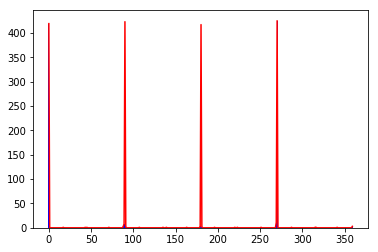

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

src = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
##src = cv2.imread('./data/line.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(angle)
print('angle:', minVal, maxVal, minLoc, maxLoc)

#2
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)
cv2.imshow('edge',  edge)

#3
width, height = mag.shape[:2]
angleM = np.full((width,height,3), (255, 255, 255), dtype= np.uint8)
for y in range(height):
    for x in range(width):
        if edge[y, x] != 0: # if mag[y, x] > 100: # edge
            if angle[y, x] ==   0:
                angleM[y, x] =  (0, 0, 255)   # red
            elif angle[y, x] == 90:
                 angleM[y, x] = (0, 255, 0)   # green
            elif angle[y, x] ==180:
                 angleM[y, x] = (255, 0, 0)   # blue                 
            elif angle[y, x] ==270:
                 angleM[y, x] = (0, 255, 255) # yellow
            else:
                angleM[y, x] =  (128, 128, 128) # gray                
cv2.imshow('angleM',  angleM)
##cv2.waitKey()    
##cv2.destroyAllWindows()

#4
hist = cv2.calcHist(images=[angle], channels=[0], mask=edge,
                    histSize=[360], ranges=[0, 360])

hist = hist.flatten()
##plt.title('hist: binX = np.arange(360)')
plt.plot(hist, color='r')
binX = np.arange(360)
plt.bar(binX, hist, width=1, color='b')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

### 2.3 Laplacian filter 1

In [5]:
import cv2
import numpy as np

#1
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur= cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
cv2.imshow('src',  src)
cv2.imshow('blur', blur)

#2
lap  = cv2.Laplacian(src, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)
print('lap:', minVal, maxVal, minLoc, maxLoc)
dst = cv2.convertScaleAbs(lap)
dst = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('lap',  lap)
cv2.imshow('dst',  dst)

#3
lap2 = cv2.Laplacian(blur, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap2)
print('lap2:', minVal, maxVal, minLoc, maxLoc)
dst2 = cv2.convertScaleAbs(lap2)
dst2 = cv2.normalize(dst2, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('lap2',  lap2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()    
cv2.destroyAllWindows()

lap: -239.0 189.0 (404, 181) (221, 287)
lap2: -35.0 30.0 (180, 435) (367, 449)


### 2.4 Laplacian filter 2: Zero-crossing

In [6]:
import cv2
import numpy as np

#1
#src  = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
src  = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(src, ksize=(15, 15), sigmaX=0.0)
lap = cv2.Laplacian(blur, cv2.CV_32F,3)

##ret, edge = cv2.threshold(np.abs(lap), 10, 255, cv2.THRESH_BINARY)
##edge = edge.astype(np.uint8)
##cv2.imshow('edge',  edge)

#2
def SGN(x):
    if x >= 0:
        sign = 1
    else:
        sign = -1
    return sign

def zeroCrossing(lap):
    width, height = lap.shape
    Z = np.zeros(lap.shape, dtype=np.uint8)    
    for y in range(1, height-1):
        for x in range(1,width-1):
            neighbors=[lap[y-1,x], lap[y+1,x], lap[y,x-1], lap[y,x+1],
                       lap[y-1,x-1], lap[y-1,x+1], lap[y+1,x-1], lap[y+1,x+1]]                       
            mValue= min(neighbors)
            if SGN(lap[y,x]) != SGN(mValue):
                Z[y, x] = 255
    return Z
edgeZ = zeroCrossing(lap)
cv2.imshow('Zero Crossing',  edgeZ)
cv2.waitKey()    
cv2.destroyAllWindows()

## 3. General filter operations

### 3.1 edge detection using cv2.filter2D() & cv2.sepFilter2D()

In [7]:
import cv2
import numpy as np

#src  = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
src  = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

#1
kx, ky = cv2.getDerivKernels(1, 0, ksize=3)
sobelX = ky.dot(kx.T)
print('kx=', kx)
print('ky=', ky)
print('sobelX=', sobelX)
gx = cv2.filter2D(src, cv2.CV_32F, sobelX)
##gx = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

#2
kx, ky = cv2.getDerivKernels(0, 1, ksize=3)
sobelY = ky.dot(kx.T)
print('kx=', kx)
print('ky=', ky)
print('sobelY=', sobelY)
gy = cv2.filter2D(src, cv2.CV_32F, sobelY)
##gy = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

#3
mag   = cv2.magnitude(gx, gy)
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('edge',  edge)
cv2.waitKey()    
cv2.destroyAllWindows()

kx= [[-1.]
 [ 0.]
 [ 1.]]
ky= [[1.]
 [2.]
 [1.]]
sobelX= [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
kx= [[1.]
 [2.]
 [1.]]
ky= [[-1.]
 [ 0.]
 [ 1.]]
sobelY= [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


### 3.2 LoG filtering, zero-crossing edge image

In [8]:
import cv2
import numpy as np

src  = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

#1
def logFilter(ksize=7):
    k2 = ksize//2
    sigma = 0.3*(k2-1) + 0.8
    print('sigma=', sigma)
    LoG = np.zeros((ksize, ksize), dtype=np.float32)
    for y in range(-k2, k2+1):
        for x in range(-k2, k2+1):
            g = -(x*x+y*y)/(2.0*sigma**2.0)
            LoG[y+k2, x+k2] = -(1.0+g)*np.exp(g)/(np.pi*sigma**4.0)
    return LoG

#2
kernel = logFilter() #7, 15, 31, 51
LoG = cv2.filter2D(src, cv2.CV_32F, kernel)
cv2.imshow('LoG',  LoG)

#3
def zeroCrossing2(lap, thresh=0.01):
    width, height = lap.shape
    Z = np.zeros(lap.shape, dtype=np.uint8)    
    for y in range(1, height-1):
        for x in range(1,width-1):
            neighbors=[lap[y-1,x],   lap[y+1,x],   lap[y,x-1],   lap[y,x+1],
                       lap[y-1,x-1], lap[y-1,x+1], lap[y+1,x-1], lap[y+1,x+1]]
            pos = 0
            neg = 0
            for value in neighbors:
                if value > thresh:
                    pos += 1
                if value < -thresh:  # value < thresh
                    neg += 1
            if pos > 0 and neg > 0:
                Z[y, x] = 255                        
    return Z
edgeZ = zeroCrossing2(LoG)
cv2.imshow('Zero Crossing2',  edgeZ)
cv2.waitKey()    
cv2.destroyAllWindows()

sigma= 1.4


## 4. Morphological operations

### 4.1 erode() & dilate()

In [9]:
import cv2
import numpy as np

src   = cv2.imread('./data/morphology.jpg', cv2.IMREAD_GRAYSCALE)
kernel= cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))
erode = cv2.erode(src,kernel,iterations = 5)
dilate = cv2.dilate(src,kernel,iterations = 5)
erode2= cv2.erode(dilate,kernel,iterations = 7)
##dilate2= cv2.dilate(erode2,kernel,iterations = 2)

cv2.imshow('src',    src)
cv2.imshow('erode',  erode)
cv2.imshow('dilate', dilate)
cv2.imshow('erode2', erode2)
##cv2.imshow('dilate2',    dilate2)
cv2.waitKey()
cv2.destroyAllWindows()

### 4.2 morphologyEx()

In [10]:
import cv2
import numpy as np

src   = cv2.imread('./data/morphology.jpg', cv2.IMREAD_GRAYSCALE)
kernel= cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))
closing = cv2.morphologyEx(src,cv2.MORPH_CLOSE,kernel,iterations = 5)
opening = cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel,iterations = 5)
gradient = cv2.morphologyEx(opening,cv2.MORPH_GRADIENT,kernel)
#gradient=cv2.morphologyEx(opening,cv2.MORPH_GRADIENT,kernel, iterations=5)

tophat = cv2.morphologyEx(src,cv2.MORPH_TOPHAT,kernel,iterations = 5)
balckhat = cv2.morphologyEx(src,cv2.MORPH_BLACKHAT,kernel,iterations = 5)

cv2.imshow('opening',  opening)
cv2.imshow('closing',  closing)
cv2.imshow('gradient', gradient)
cv2.imshow('tophat',   tophat)
cv2.imshow('balckhat', balckhat)
cv2.waitKey()
cv2.destroyAllWindows()

### 4.3 morphological operation skeleton

In [11]:
"""
ref: https://gist.github.com/jsheedy/3913ab49d344fac4d02bcc887ba4277d
ref: http://felix.abecassis.me/2011/09/opencv-morphological-skeleton/
"""
import cv2
import numpy as np

#1
#src = cv2.imread('./data/T.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('./data/alphabet.bmp', cv2.IMREAD_GRAYSCALE)
src = cv2.bitwise_not(src)

ret, A = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY)
skel_dst = np.zeros(src.shape, np.uint8)

#2
shape1=cv2.MORPH_CROSS
shape2=cv2.MORPH_RECT
B= cv2.getStructuringElement(shape=shape1, ksize=(3,3))
done = True
while done:   
    erode  = cv2.erode(A, B)
##  opening = cv2.dilate(erode,B)
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, B)
    tmp    = cv2.subtract(erode, opening) # cv2.absdiff(erode, opening)
    skel_dst = cv2.bitwise_or(skel_dst, tmp)
    A = erode.copy()
    done = cv2.countNonZero(A) != 0
    
#cv2.imshow('opening',  opening)
#cv2.imshow('tmp',  tmp)    
#cv2.imshow('skel_dst',  skel_dst)
#cv2.waitKey()

cv2.imshow('src',  src)    
cv2.imshow('skel_dst',  skel_dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 5. Template matching

### 5.1 cv2.matchTemplate()

In [12]:
import cv2
import numpy as np

src   = cv2.imread('./data/alphabet.bmp', cv2.IMREAD_GRAYSCALE)
tmp_A   = cv2.imread('./data/A.bmp', cv2.IMREAD_GRAYSCALE)
tmp_S   = cv2.imread('./data/S.bmp', cv2.IMREAD_GRAYSCALE)
tmp_b   = cv2.imread('./data/b.bmp', cv2.IMREAD_GRAYSCALE)
dst  = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)  # 출력 표시 영상

#1
R1 = cv2.matchTemplate(src, tmp_A, cv2.TM_SQDIFF_NORMED)
minVal, _, minLoc, _ = cv2.minMaxLoc(R1)
print('TM_SQDIFF_NORMED:', minVal, minLoc)

w, h = tmp_A.shape[:2]
cv2.rectangle(dst, minLoc, (minLoc[0]+h, minLoc[1]+w), (255, 0, 0), 2)

#2
R2 = cv2.matchTemplate(src, tmp_S, cv2.TM_CCORR_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R2)
print('TM_CCORR_NORMED:', maxVal, maxLoc)
w, h = tmp_S.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0]+h, maxLoc[1]+w), (0, 255, 0), 2)

#3
R3 = cv2.matchTemplate(src, tmp_b, cv2.TM_CCOEFF_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R3)
print('TM_CCOEFF_NORMED:', maxVal, maxLoc)
w, h = tmp_b.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0]+h, maxLoc[1]+w), (0, 0, 255), 2)

cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()

TM_SQDIFF_NORMED: 1.6839450722727634e-07 (18, 20)
TM_CCORR_NORMED: 1.0 (280, 146)
TM_CCOEFF_NORMED: 1.0 (92, 280)
